# Лабораторная работа 1

## Введение


**Что такое предварительный анализ данных?**

Предварительный анализ данных (EDA - Exploratory Data Analysis) - это получение представления о наборе данных путем обобщения его основных характеристик и их визуального отображения. Этот шаг очень важен, особенно когда речь идет о подготовке данных для применения методов машинного обучения. Визуализация в EDA включает в себя гистограммы, графики, диаграммы рассеяния и многое другое.

**Как провести предварительный анализ данных?**

Ответ зависит от набора данных, с которым вы работаете. Не существует единого метода или общих методов для выполнения EDA, но здесь буду приведены некоторые общие шаги.

**Какие данные мы исследуем?**



Набор данных автомобилей. Данные содержат более 10 000 строк и более 10 столбцов, которые содержат характеристики автомобиля, такие как тип топлива двигателя, мощность двигателя, тип коробки передач, MPG на шоссе, MPG в городе и многое другое. Далее мы изучим данные и подготовим их к моделированию.



---



## 1. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline 



---



## 2. Загрузка данных в датафрейм

Так как наш набор данных в формате csv, прочитаем его следующей функцией в pandas (опционально можно подключить гугл диск, чтобы брать датасеты из него)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_csv("master.csv")
# To display the top 5 rows 
df.head(5)               

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.tail(5)                        # To display the botton 5 rows

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers




---



## 3. Проверка типов данных

Здесь мы проверяем типы данных, потому что иногда цена автомобиля хранится в виде строки, поэтому следует преобразовать эту строку в целочисленные данные, только тогда возможно отобразить данные на графике. В данном случае данные уже представлены в целочисленном формате, поэтому беспокоиться не о чем.

In [5]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object



---



## 4. Удаление нерелевантных колонок

Этот шаг, в каждом анализе данных, потому что иногда в наборе данных представлены неиспользуемые столбцы, которые следует отбросить. 

In [6]:
df = df.drop(['HDI for year', 'country-year'], axis=1)
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers




---



В данном случае большинство названий столбцов нечитаемы, поэтому переименуем их.

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)



---



## 6. Удаление дубликатов

Большой набор данных (более 10 000 строк), часто может содержать в себе дубликаты. Например, до удаления в данном наборе было 11914 строк данных, а после удаления дубликатов 10925, таким образом набор данных содержал 989 строк дубликатов.

In [7]:
df.shape

(27820, 10)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [9]:
df.count()      # Used to count the number of rows

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

В датафрейме представлено 11914 строк, удалим 989 строк, содержащих дубликаты.

In [10]:
df = df.drop_duplicates()
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [11]:
df.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64



---



## 7. Удаление пропусков

Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются. Также применяются тактики замены отсутствующих значений средним значением или средним значением этого столбца. В данном случае пропущено 99 значений - достаточная низкая доля всего набора данных из 10000 значений, поэтому удаление строк с пропущенными значениями не критично. 

In [12]:
print(df.isnull().sum())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


In [13]:
df = df.dropna()    # Dropping the missing values.
df.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

Удалили все строки с пропущенными значениями (Cylinders и Horsepower (HP)).

In [14]:
print(df.isnull().sum())   # After dropping the values

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64




---



## 8. Определение выбросов

Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами". Ниже показаны графики MSRP, Cylinders, Horsepower и EngineSize. На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы. 

<AxesSubplot:xlabel='population'>

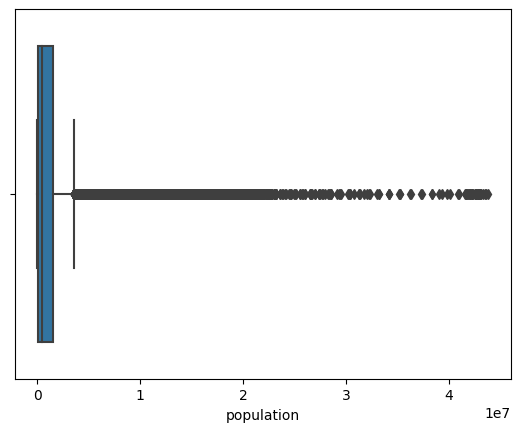

In [16]:
sns.boxplot(x=df[''])

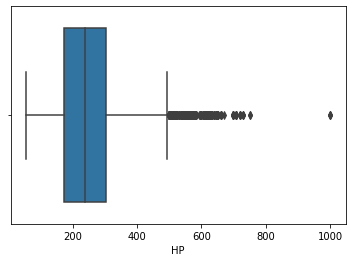

In [96]:
sns.boxplot(x=df['HP'])

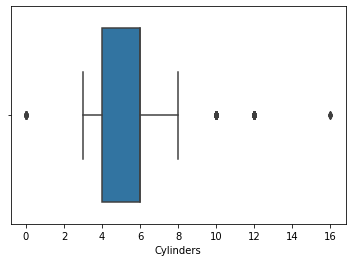

In [97]:
sns.boxplot(x=df['Cylinders'])

In [98]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [99]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(9191, 10)

Как видно из вышеприведенного, около 1600 строк были пропущены. Но не получится полностью удалить выбросы, потому что даже после использования вышеописанной техники, возможно, 1-2 выброса останутся не удаленными, тем не менее, выбросов было более 100. 



---



## 9. Построение графиков различных характеристик относительно друг друга (разброс), относительно частоты (гистограмма)

### Гистограммы

Гистограмма показывает встречаемость переменных в интервале. В данном случае существует в основном 10 различных типов компаний-производителей автомобилей, но часто бывает важно узнать, кто имеет распределение по производителю. Для этого гистограмма является одним из тривиальных решений, которое позволяет узнать общее количество автомобилей, произведенных той или иной компанией.

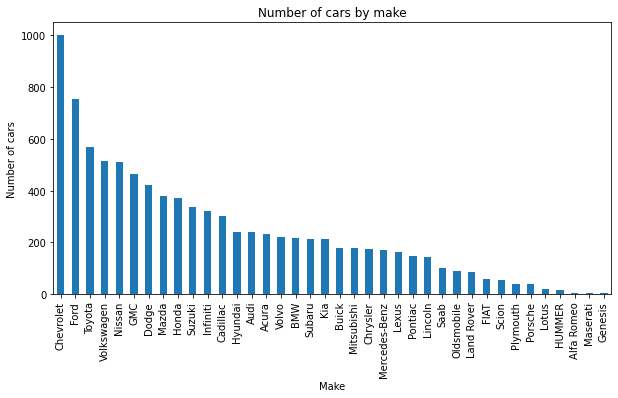

In [100]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты. На приведенной ниже тепловой карте видно. что ценовая характеристика в основном зависит от мощности и года выпуска

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


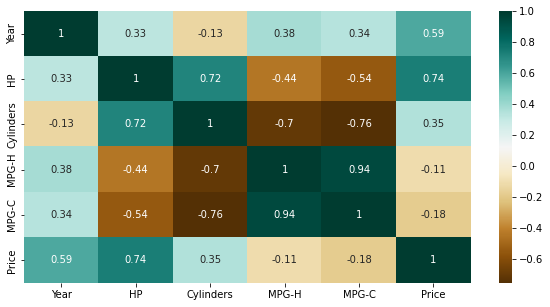

In [101]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Диаграмма рассеяния

Диаграммы рассеяния используются чтобы найти корреляцию между двумя переменными. Здесь диаграммы рассеяния построены между лошадиными силами и ценой. На приведенном ниже графике можно легко отобразить линию тренда. 

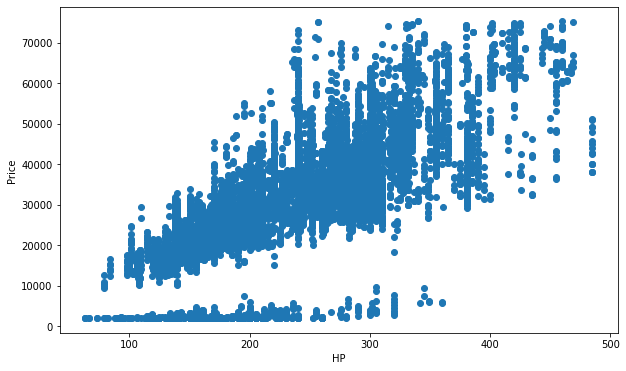

In [102]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Здесь приведен базовый пример предварительного анализа данных. В реальном мире, к сожалению, все сложнее.**

## Спасибо за внимание!

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

(array([ 805.,  404., 1608., 2130., 1723., 1148.,  652.,  335.,  262.,
         124.]),
 array([ 2000.,  9320., 16640., 23960., 31280., 38600., 45920., 53240.,
        60560., 67880., 75200.]),
 <a list of 10 Patch objects>)

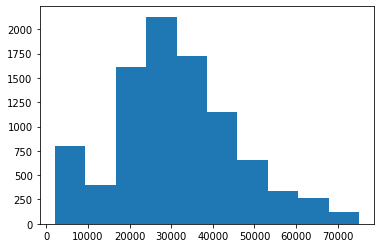

In [174]:
plt.hist(df["Price"])

In [144]:
df_price_cat = df.copy()
df_price_cat_hp = df[["HP", "Price"]]

In [145]:
df_price_cat_hp

,HP,Price
0,335.0,46135
1,300.0,40650
2,300.0,36350
3,230.0,29450
4,230.0,34500
...,...,...
11909,300.0,46120
11910,300.0,56670
11911,300.0,50620
11912,300.0,50920


In [146]:
df_price_cat_hp['Price'] = np.where(df_price_cat_hp['Price']>=35000, '1', '0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
df_price_cat_hp

,HP,Price
0,335.0,1
1,300.0,1
2,300.0,1
3,230.0,0
4,230.0,0
...,...,...
11909,300.0,1
11910,300.0,1
11911,300.0,1
11912,300.0,1


In [148]:
df_price_cat["Price"].value_counts()

2000     279
29995     18
20995     15
21995     14
25995     13
        ... 
3192       1
3878       1
3752       1
3572       1
50920      1
Name: Price, Length: 5110, dtype: int64

In [150]:
X = df_price_cat_hp

In [151]:
X

,HP,Price
0,335.0,1
1,300.0,1
2,300.0,1
3,230.0,0
4,230.0,0
...,...,...
11909,300.0,1
11910,300.0,1
11911,300.0,1
11912,300.0,1


In [155]:
y = df_price_cat_hp.pop("Price")

In [156]:
X

,HP
0,335.0
1,300.0
2,300.0
3,230.0
4,230.0
...,...
11909,300.0
11910,300.0
11911,300.0
11912,300.0


In [157]:
y

0        1
1        1
2        1
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: Price, Length: 9191, dtype: object

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [159]:
X_train

,HP
9704,173.0
10283,263.0
1562,335.0
3596,275.0
8581,170.0
...,...
7525,260.0
6805,116.0
7071,300.0
1254,278.0


In [160]:
y_train

9704     0
10283    0
1562     1
3596     1
8581     0
        ..
7525     0
6805     0
7071     0
1254     0
9582     1
Name: Price, Length: 6157, dtype: object

In [161]:
clf = LogisticRegression(random_state=22)

In [162]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=22)

In [164]:
y_pred = clf.predict(X_test)

In [171]:
from sklearn.metrics import classification_report, confusion_matrix

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1965
           1       0.70      0.73      0.72      1069

    accuracy                           0.80      3034
   macro avg       0.78      0.78      0.78      3034
weighted avg       0.80      0.80      0.80      3034



In [172]:
print(confusion_matrix(y_test,y_pred))

[[1633  332]
 [ 288  781]]
